In [1]:
import pandas as pd

df= pd.read_csv('Stagged_data.csv')
df.head()

,Unnamed: 0,Surrogate Keys,Country,Year,Emissions Unit,CO2_Emissions,GreenhouseGas_Emissions,Methane_Emissions,NitrousOxide_Emissions,FluorinatedGases_Emissions,...,HottestMonth,HottestMonthTemperature,YearlyTemperatureChange,CO2_Emissions_Bucket,GreenhouseGas_Emissions_Bucket,Methane_Emissions_Bucket,NitrousOxide_Emissions_Bucket,FluorinatedGases_Emissions_Bucket,Total_emissions_Bucket,YearlyTemperatureChange_Bucket
0,0,1,Africa,1970,Million metric tons of CO2 equivalent,64870.726312,184.519702,165907.310511,83831.162105,17020.902415,...,May,25.910,NaN,"(63267.757, 3408222.516]","(75.487, 233.043]","(83782.85, 4354604.956]","(16267.388, 680577.362]","(4601.992, 162808.507]","(167565.7, 8709209.912]",NaN
1,1,2,Africa,1971,Million metric tons of CO2 equivalent,65698.449942,230.533470,167785.877827,84608.622741,17248.271662,...,May,25.542,-0.388500,"(63267.757, 3408222.516]","(75.487, 233.043]","(83782.85, 4354604.956]","(16267.388, 680577.362]","(4601.992, 162808.507]","(167565.7, 8709209.912]","(-0.588, -0.347]"
2,2,3,Africa,1972,Million metric tons of CO2 equivalent,71123.001404,256.200155,176209.783378,87357.595343,17472.986474,...,September,26.230,0.266000,"(63267.757, 3408222.516]","(233.043, 979.53]","(83782.85, 4354604.956]","(16267.388, 680577.362]","(4601.992, 162808.507]","(167565.7, 8709209.912]","(0.245, 0.39]"
3,3,4,Africa,1973,Million metric tons of CO2 equivalent,80463.562871,292.605500,189116.514777,90787.750991,17572.595426,...,May,26.209,0.201000,"(63267.757, 3408222.516]","(233.043, 979.53]","(83782.85, 4354604.956]","(16267.388, 680577.362]","(4601.992, 162808.507]","(167565.7, 8709209.912]","(0.123, 0.245]"
4,4,5,Africa,1974,Million metric tons of CO2 equivalent,84212.720530,328.357094,193014.219266,90651.556696,17821.584994,...,June,25.670,-0.569667,"(63267.757, 3408222.516]","(233.043, 979.53]","(83782.85, 4354604.956]","(16267.388, 680577.362]","(4601.992, 162808.507]","(167565.7, 8709209.912]","(-0.588, -0.347]"


In [2]:
columns_to_remove = ['Country', 'Emissions Unit', 'Surrogate Keys', 'Unnamed: 0', 'CO2_Emissions_Bucket', 'GreenhouseGas_Emissions_Bucket', 'Methane_Emissions_Bucket', 'NitrousOxide_Emissions_Bucket', 'FluorinatedGases_Emissions_Bucket', 'Total_emissions_Bucket', 'YearlyTemperatureChange_Bucket']
df = df.drop(columns=columns_to_remove)
df.head()

,Year,CO2_Emissions,GreenhouseGas_Emissions,Methane_Emissions,NitrousOxide_Emissions,FluorinatedGases_Emissions,Total_emissions,AverageYearlyTemperature,ColdestMonth,ColdestMonthTemperature,HottestMonth,HottestMonthTemperature,YearlyTemperatureChange
0,1970,64870.726312,184.519702,165907.310511,83831.162105,17020.902415,331814.621045,24.322,December,20.988,May,25.910,NaN
1,1971,65698.449942,230.533470,167785.877827,84608.622741,17248.271662,335571.755642,23.933,January,20.897,May,25.542,-0.388500
2,1972,71123.001404,256.200155,176209.783378,87357.595343,17472.986474,352419.566753,24.199,January,20.998,September,26.230,0.266000
3,1973,80463.562871,292.605500,189116.514777,90787.750991,17572.595426,378233.029565,24.400,December,20.976,May,26.209,0.201000
4,1974,84212.720530,328.357094,193014.219266,90651.556696,17821.584994,386028.438580,23.830,January,20.502,June,25.670,-0.569667


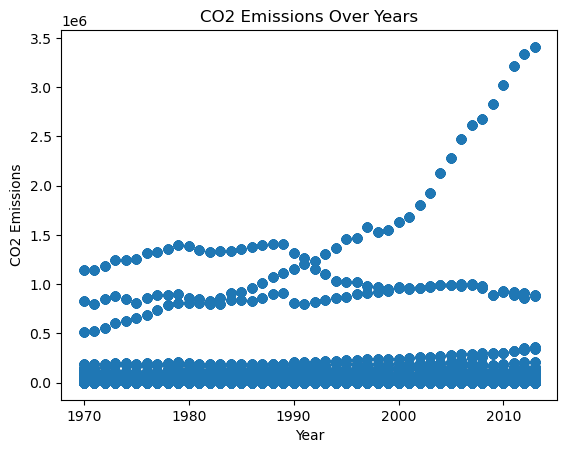

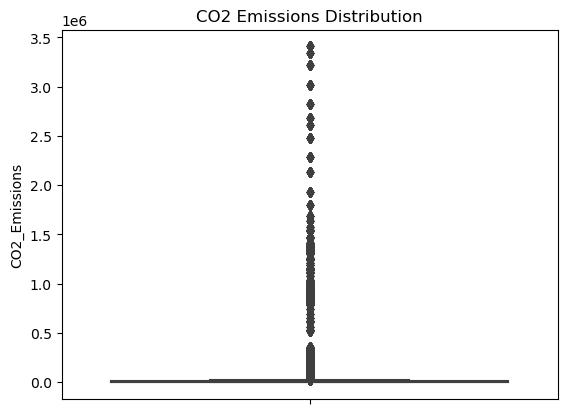

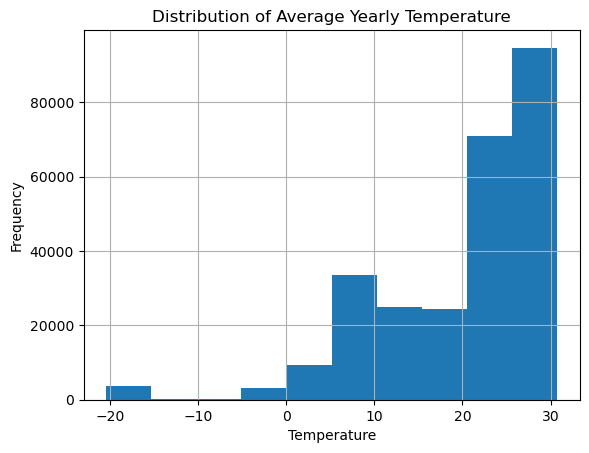

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Scatter plot
plt.scatter(df['Year'], df['CO2_Emissions'])
plt.title('CO2 Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.show()

# Boxplot
sns.boxplot(y=df['CO2_Emissions'])
plt.title('CO2 Emissions Distribution')
plt.show()

# Histogram
df['AverageYearlyTemperature'].hist()
plt.title('Distribution of Average Yearly Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


In [4]:
#We only have one missing value for each country in this situation (Yearly temp change for year 1970)
#Imputing this value with mean, median or most freequent values would not work so the best way to handle this is to remove the rows
df = df.dropna()
df.head(10)

,Year,CO2_Emissions,GreenhouseGas_Emissions,Methane_Emissions,NitrousOxide_Emissions,FluorinatedGases_Emissions,Total_emissions,AverageYearlyTemperature,ColdestMonth,ColdestMonthTemperature,HottestMonth,HottestMonthTemperature,YearlyTemperatureChange
1,1971,65698.449942,230.533470,167785.877827,84608.622741,17248.271662,335571.755642,23.933,January,20.897,May,25.542,-0.388500
2,1972,71123.001404,256.200155,176209.783378,87357.595343,17472.986474,352419.566753,24.199,January,20.998,September,26.230,0.266000
3,1973,80463.562871,292.605500,189116.514777,90787.750991,17572.595426,378233.029565,24.400,December,20.976,May,26.209,0.201000
4,1974,84212.720530,328.357094,193014.219266,90651.556696,17821.584994,386028.438580,23.830,January,20.502,June,25.670,-0.569667
5,1975,82959.306278,364.395806,188397.611834,86744.526681,18329.383098,376795.223697,23.920,January,20.372,May,25.601,0.089333
6,1976,91053.534066,489.811573,204854.918954,94650.630788,18660.942531,409709.837911,23.912,January,20.494,September,25.781,-0.007833
7,1977,91158.547143,577.677385,208190.652165,97387.904915,19066.522678,416381.304286,24.274,December,21.335,September,25.935,0.362333
8,1978,89708.693735,551.583210,206918.571293,97145.308170,19512.986171,413837.142579,24.222,January,21.224,May,25.866,-0.052083
9,1979,97652.958906,645.905219,223169.467432,104805.836395,20064.766883,446338.934836,24.498,December,21.068,September,26.069,0.276250
10,1980,100115.406057,698.648649,222787.858620,101479.411544,20494.392365,445575.717235,24.447,December,21.039,September,26.080,-0.051750


In [5]:
#One hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(df[['ColdestMonth', 'HottestMonth']])
df_encoded = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out())
df = pd.concat([df, df_encoded], axis=1)
df.head()

C:\Users\evand008\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Year,CO2_Emissions,GreenhouseGas_Emissions,Methane_Emissions,NitrousOxide_Emissions,FluorinatedGases_Emissions,Total_emissions,AverageYearlyTemperature,ColdestMonth,ColdestMonthTemperature,...,HottestMonth_December,HottestMonth_February,HottestMonth_January,HottestMonth_July,HottestMonth_June,HottestMonth_March,HottestMonth_May,HottestMonth_November,HottestMonth_October,HottestMonth_September
1,1971.0,65698.449942,230.533470,167785.877827,84608.622741,17248.271662,335571.755642,23.933,January,20.897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1972.0,71123.001404,256.200155,176209.783378,87357.595343,17472.986474,352419.566753,24.199,January,20.998,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1973.0,80463.562871,292.605500,189116.514777,90787.750991,17572.595426,378233.029565,24.400,December,20.976,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1974.0,84212.720530,328.357094,193014.219266,90651.556696,17821.584994,386028.438580,23.830,January,20.502,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1975.0,82959.306278,364.395806,188397.611834,86744.526681,18329.383098,376795.223697,23.920,January,20.372,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
# Scaling all emissions and yearly average temp to a value between 1 and 0
scaler = MinMaxScaler()
df[['CO2_Emissions', 'GreenhouseGas_Emissions', 'Methane_Emissions', 'NitrousOxide_Emissions', 'FluorinatedGases_Emissions', 'Total_emissions', 'AverageYearlyTemperature']] = scaler.fit_transform(df[['CO2_Emissions', 'GreenhouseGas_Emissions', 'Methane_Emissions', 'NitrousOxide_Emissions', 'FluorinatedGases_Emissions', 'Total_emissions', 'AverageYearlyTemperature']])
df.head()
df.columns

Index(['Year', 'CO2_Emissions', 'GreenhouseGas_Emissions', 'Methane_Emissions',
       'NitrousOxide_Emissions', 'FluorinatedGases_Emissions',
       'Total_emissions', 'AverageYearlyTemperature', 'ColdestMonth',
       'ColdestMonthTemperature', 'HottestMonth', 'HottestMonthTemperature',
       'YearlyTemperatureChange', 'ColdestMonth_April', 'ColdestMonth_August',
       'ColdestMonth_December', 'ColdestMonth_February',
       'ColdestMonth_January', 'ColdestMonth_July', 'ColdestMonth_June',
       'ColdestMonth_March', 'ColdestMonth_May', 'ColdestMonth_November',
       'ColdestMonth_October', 'ColdestMonth_September', 'HottestMonth_April',
       'HottestMonth_August', 'HottestMonth_December', 'HottestMonth_February',
       'HottestMonth_January', 'HottestMonth_July', 'HottestMonth_June',
       'HottestMonth_March', 'HottestMonth_May', 'HottestMonth_November',
       'HottestMonth_October', 'HottestMonth_September'],
      dtype='object')

In [7]:
# Feature selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

columns_to_remove = ['HottestMonth', 'ColdestMonth', 'Year']
df = df.drop(columns=columns_to_remove)
df = df.fillna(0)
X = df.drop('YearlyTemperatureChange', axis=1)
y = df['YearlyTemperatureChange']

rf_regressor = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
selector = RFE(rf_regressor, n_features_to_select=5, step=5)
selector = selector.fit(X, y)

# Selected feature names
selected_features = X.columns[selector.support_]
# These are the features that best corelate to the average yearly temperature change  
print(selected_features)

Index(['NitrousOxide_Emissions', 'FluorinatedGases_Emissions',
       'AverageYearlyTemperature', 'ColdestMonthTemperature',
       'HottestMonthTemperature'],
      dtype='object')


In [8]:
from sklearn.model_selection import train_test_split

# Splitting the data into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time
from sklearn.metrics import mean_squared_error
from math import sqrt

models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    #RMSE provides a measure of how accurately the model predicts the continuous target variable, with lower values indicating better performance.
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {
        "RMSE": rmse,
        "CT": end_time - start_time
    }

for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Root Mean Squared Error: {metrics['RMSE']:.4f}")
    print(f"  Construction Time: {metrics['CT']:.4f} seconds\n")

# Did it with RMSE because this is a regression model and  accuracy, precision, and recall aren't directly applicable (They are for classification with constant values for the target)

Decision Tree:
  Root Mean Squared Error: 0.0027
  Construction Time: 3.1020 seconds

Gradient Boosting:
  Root Mean Squared Error: 0.4813
  Construction Time: 51.0892 seconds

Random Forest:
  Root Mean Squared Error: 0.0010
  Construction Time: 62.7661 seconds

